In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [3]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [4]:
test["Survived"] = np.nan

ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train,test)).reset_index(drop=True)

print("all_data siaze is:{}".format(all_data.shape))

all_data siaze is:(1309, 12)


In [5]:
#profile = ProfileReport(all_data, title="Titanic Data", explorative=True)

#profile.to_file("Titanic_Data_Profile.html")

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
all_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [8]:
all_data.drop(['Ticket'], axis=1, inplace=True)

all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [9]:
#pd.options.display.float_format = "{:,.2f}".format

#all_data.head()

In [10]:
all_data["Title"] = all_data.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

all_data['Title'] = all_data['Title'].replace(['Sir', 'Countess', 'Lady', 'Col', 'Major', 'Dr', 'Jonkheer', 'Don', 
                                               'Dona', 'Rev', 'Capt'], 'Rare')
all_data['Title'] = all_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
all_data['Title'] = all_data['Title'].replace('Mme', 'Mrs')

all_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [11]:
all_data.drop(['Name'], axis=1, inplace=True)

In [12]:
all_data["Cabin"] = all_data.Cabin.str.extract('(^([A-Z]))', expand = False)

all_data.Cabin[all_data.Cabin.isnull() == True] = 'Unk'

all_data[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
8,Unk,0.299854
7,T,0.000000


In [13]:
all_data = MultiColumnLabelEncoder(columns=['Cabin']).fit_transform(all_data)

all_data[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
3,3,0.757576
4,4,0.750000
1,1,0.744681
5,5,0.615385
2,2,0.593220
6,6,0.500000
0,0,0.466667
8,8,0.299854
7,7,0.000000


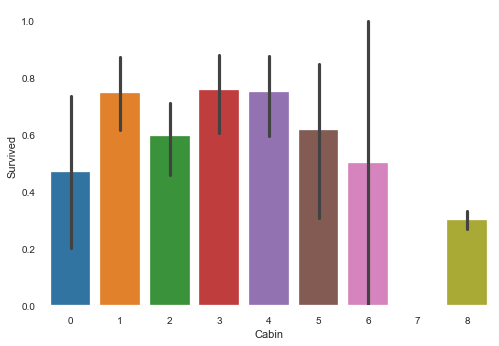

In [14]:
sns.barplot(all_data['Cabin'], all_data['Survived']);

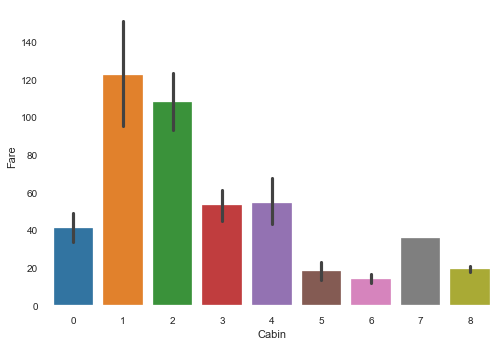

In [15]:
sns.barplot(all_data['Cabin'], all_data['Fare']);

In [16]:
all_data['Fare'].fillna(all_data['Fare'].dropna().median(), inplace=True)

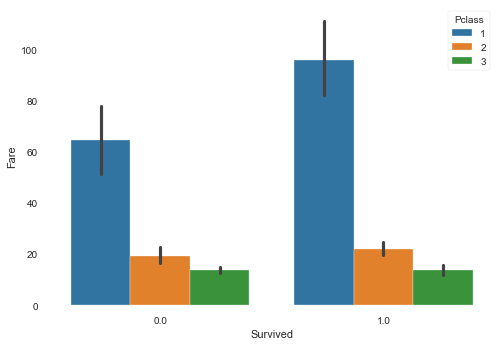

In [17]:
sns.barplot(all_data['Survived'], all_data['Fare'], all_data['Pclass']);

In [18]:
#all_data.drop(['Embarked'], axis=1, inplace=True)
all_data.Embarked[all_data.Embarked.isnull() == True] = 'S'

In [19]:
all_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


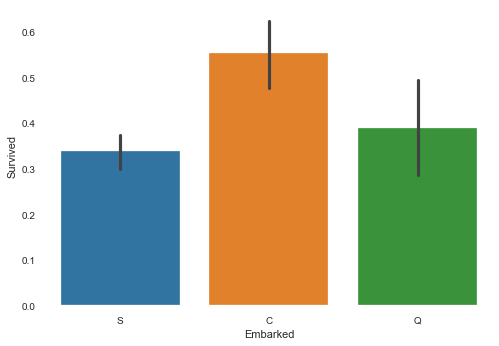

In [20]:
sns.barplot(all_data['Embarked'], all_data['Survived']);

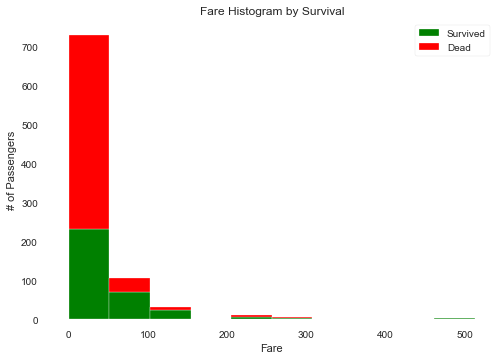

In [21]:
plt.hist(x = [all_data[all_data['Survived']==1]['Fare'],
        all_data[all_data['Survived']==0]['Fare']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare')
plt.ylabel('# of Passengers')
plt.legend()

In [22]:
all_data['FareBand'] = pd.cut(all_data['Fare'],30)
all_data = MultiColumnLabelEncoder(columns=['FareBand']).fit_transform(all_data)
all_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,0,0.266129
1,1,0.455497
2,2,0.311111
3,3,0.688889
4,4,0.562500
5,5,0.923077
6,6,0.636364
7,7,0.909091
8,8,0.666667
9,9,1.000000


In [23]:
all_data.drop(['Fare'], axis=1, inplace=True)

In [24]:
all_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=False)

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [25]:
#from scipy import stats
#from scipy.stats import norm

#histogram and normal probability plot
#sns.distplot(all_data['Fare'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(all_data['Fare'], plot=plt)

In [26]:
#applying log transformation
#all_data['Fare'] = np.log1p(all_data['Fare'])

#histogram and normal probability plot
#sns.distplot(all_data['Fare'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(all_data['Fare'], plot=plt)

In [27]:
all_data.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title,FareBand
count,1309.000000,891.000000,1309.000000,1309,1046.000000,1309.000000,1309.000000,1309.000000,1309,1309,1309.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3,5,NaN
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Mr,NaN
freq,NaN,NaN,NaN,843,NaN,NaN,NaN,NaN,916,757,NaN
mean,655.000000,0.383838,2.294882,NaN,29.881138,0.498854,0.385027,6.729565,NaN,NaN,1.331551
std,378.020061,0.486592,0.837836,NaN,14.413493,1.041658,0.865560,2.454520,NaN,NaN,2.484833
min,1.000000,0.000000,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,328.000000,0.000000,2.000000,NaN,21.000000,0.000000,0.000000,8.000000,NaN,NaN,0.000000
50%,655.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,8.000000,NaN,NaN,0.000000
75%,982.000000,1.000000,3.000000,NaN,39.000000,1.000000,0.000000,8.000000,NaN,NaN,1.000000


In [28]:
all_data = MultiColumnLabelEncoder(columns=['Sex', 'Title','Embarked']).fit_transform(all_data)
#all_data = pd.get_dummies(all_data, columns = ['Pclass', 'Title', 'Embarked'])

all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title,FareBand
0,1,0.0,3,1,22.0,1,0,8,2,2,0
1,2,1.0,1,0,38.0,1,0,2,0,3,4
2,3,1.0,3,0,26.0,0,0,8,2,1,0
3,4,1.0,1,0,35.0,1,0,2,2,3,3
4,5,0.0,3,1,35.0,0,0,8,2,2,0


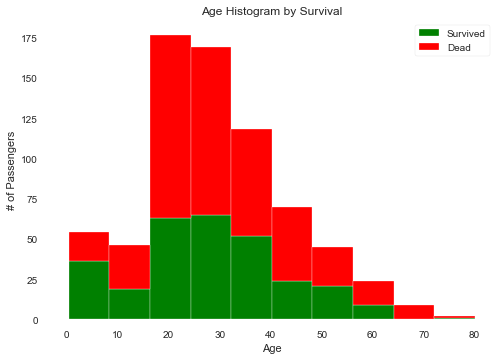

In [29]:
plt.hist(x = [all_data[all_data['Survived']==1]['Age'],
        all_data[all_data['Survived']==0]['Age']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()

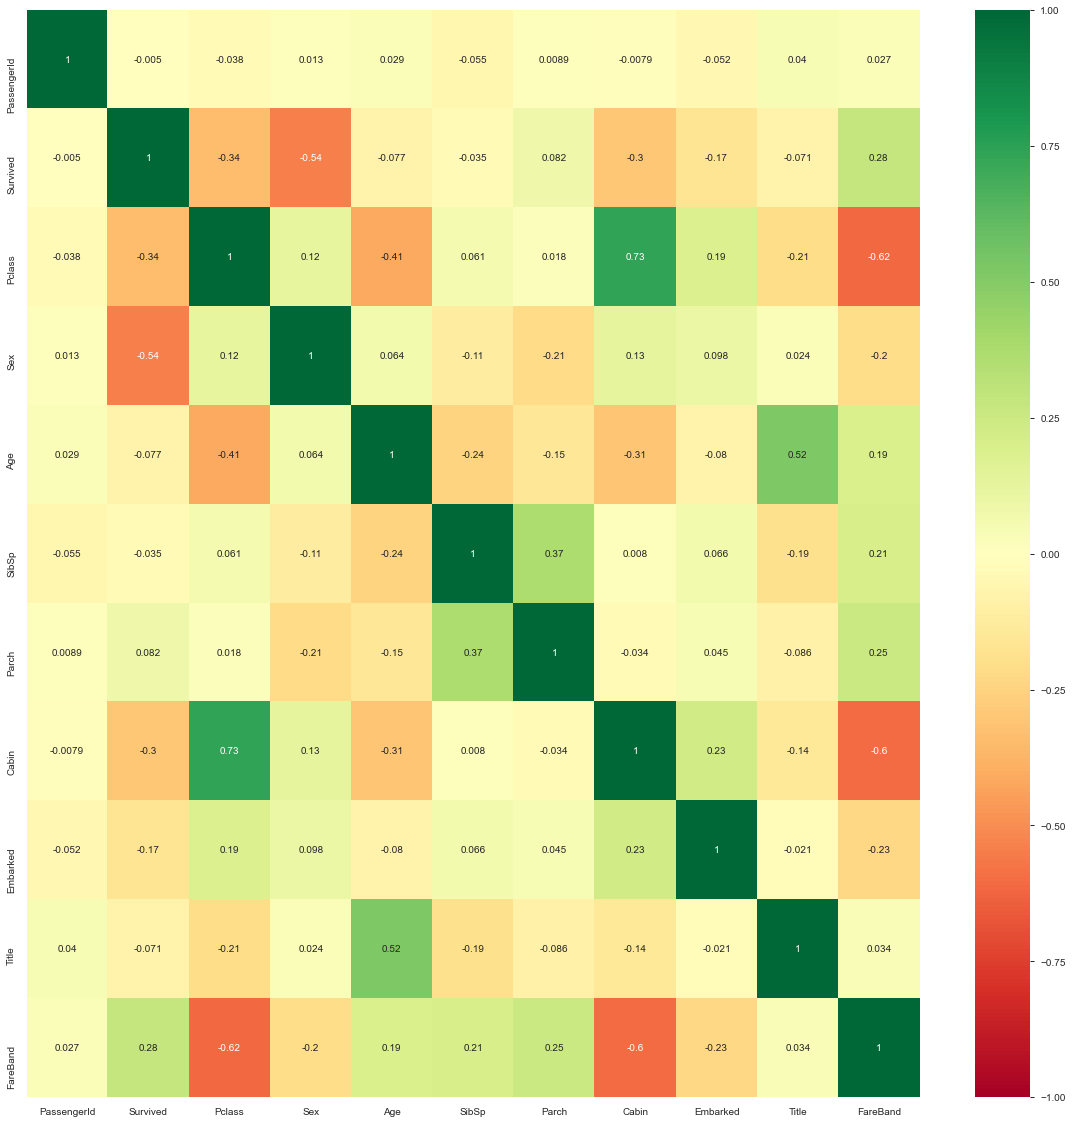

In [30]:
corr_matrix = all_data.corr()

plt.figure (figsize=(20,20))
sns.heatmap(corr_matrix, cmap='RdYlGn', vmin=-1, annot=True)

In [31]:
all_data_age = all_data.copy()

all_data_WithAge = all_data_age[pd.isnull(all_data_age['Age']) == False]
all_data_WithoutAge = all_data_age[pd.isnull(all_data_age['Age'])]

In [32]:
from sklearn.ensemble import RandomForestRegressor

use_Arguments = ['Pclass', 'SibSp', 'Parch','Cabin','Title','FareBand']

rfModel_age = RandomForestRegressor(random_state=42)

rfModel_age.fit (all_data_WithAge[use_Arguments], all_data_WithAge['Age'])

age_Values = rfModel_age.predict(X = all_data_WithoutAge[use_Arguments])

print(age_Values)

[28.35856287 32.72105193 38.6736259  28.35856287 22.92879109 28.35856287
 38.07666667 22.92879109 28.35856287 28.35856287 28.35856287 26.31364198
 22.92879109 21.12207937 49.70135101 42.99639441  5.83898531 28.35856287
 28.35856287 22.92879109 28.35856287 28.35856287 28.35856287 28.35856287
 19.11831006 28.35856287 28.35856287  2.18024167 31.02279149 28.35856287
 28.35856287 13.476      43.55797619 42.99639441  4.01794048 23.00957143
 32.72105193 40.62484127 31.23185699 28.35856287 22.92879109 17.11803571
 26.31364198 28.35856287  5.29244444 22.92879109 20.37760209 20.37760209
 28.35856287 53.34666667 28.35856287 22.92879109 42.99639441 22.92879109
 32.72105193 50.81083586 42.99639441 38.08282975 22.92879109 21.12207937
 31.16669686 28.35856287 28.63816667 17.11803571 19.18244048 37.1322619
 28.35856287 31.23185699 49.70135101 28.35856287 22.92879109 22.92879109
 26.31364198 38.6736259  22.92879109 45.17502381 28.35856287 28.35856287
  5.29244444 28.35856287 28.35856287 32.72105193 38.

In [33]:
all_data_WithoutAge['Age'] = age_Values.astype(float)

all_data.update(all_data_WithoutAge['Age'])

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Cabin        1309 non-null   int64  
 8   Embarked     1309 non-null   int64  
 9   Title        1309 non-null   int64  
 10  FareBand     1309 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 112.6 KB


In [34]:
all_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title,FareBand
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,0.644003,29.619993,0.498854,0.385027,6.729565,1.493506,1.900688,1.331551
std,378.020061,0.486592,0.837836,0.478997,13.452461,1.041658,0.865560,2.454520,0.814244,0.786492,2.484833
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000
50%,655.000000,0.000000,3.000000,1.000000,28.358563,0.000000,0.000000,8.000000,2.000000,2.000000,0.000000
75%,982.000000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,8.000000,2.000000,2.000000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,8.000000,2.000000,4.000000,14.000000


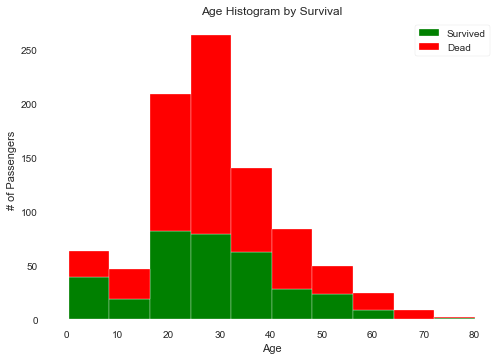

In [35]:
plt.hist(x = [all_data[all_data['Survived']==1]['Age'],
        all_data[all_data['Survived']==0]['Age']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()

In [36]:
all_data['AgeBand'] = pd.cut(all_data['Age'], 8)

all_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.0902, 10.149]",0.561644
1,"(10.149, 20.128]",0.380165
2,"(20.128, 30.106]",0.316860
3,"(30.106, 40.085]",0.461957
4,"(40.085, 50.064]",0.368932
5,"(50.064, 60.043]",0.409091
6,"(60.043, 70.021]",0.235294
7,"(70.021, 80.0]",0.200000


In [37]:
all_data['IsChild'] = np.where(all_data['Age'] < 18, 1, 0)

all_data[['IsChild', 'Survived']].groupby(['IsChild'], as_index=False).mean().sort_values(by='IsChild', ascending=True)

,IsChild,Survived
0,0,0.363399
1,1,0.507937


In [38]:
all_data['IsElderly'] = np.where(all_data['Age'] >= 60, 1, 0)

all_data[['IsElderly', 'Survived']].groupby(['IsElderly'], as_index=False).mean().sort_values(by='IsElderly', ascending=True)

,IsElderly,Survived
0,0,0.387283
1,1,0.269231


In [39]:
all_data = MultiColumnLabelEncoder(columns=['AgeBand']).fit_transform(all_data)
all_data.drop(['Age'], axis=1, inplace=True)

all_data.head()


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,FareBand,AgeBand,IsChild,IsElderly
0,1,0.0,3,1,1,0,8,2,2,0,2,0,0
1,2,1.0,1,0,1,0,2,0,3,4,3,0,0
2,3,1.0,3,0,0,0,8,2,1,0,2,0,0
3,4,1.0,1,0,1,0,2,2,3,3,3,0,0
4,5,0.0,3,1,0,0,8,2,2,0,3,0,0


In [40]:
all_data["FamilySize"] = all_data["SibSp"] + all_data["Parch"]+1
all_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

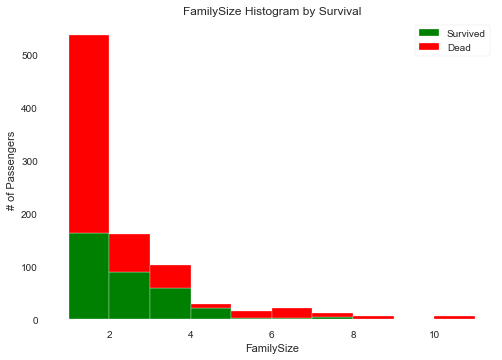

In [41]:
plt.hist(x = [all_data[all_data['Survived']==1]['FamilySize'],
        all_data[all_data['Survived']==0]['FamilySize']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('FamilySize Histogram by Survival')
plt.xlabel('FamilySize')
plt.ylabel('# of Passengers')
plt.legend()

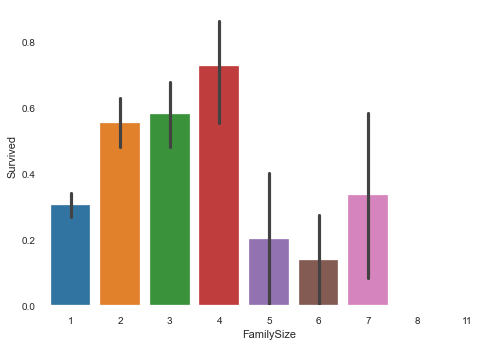

In [42]:
sns.barplot(all_data['FamilySize'], all_data['Survived']);

In [43]:
all_data['IsAlone'] = np.where(all_data['FamilySize'] == 1, 1, 0)

all_data['SmallFamily']   = all_data['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)

all_data['LargeFamily'] = np.where(all_data['FamilySize'] > 4, 1, 0)


In [44]:
all_data['FamilyBand'] = pd.cut(all_data['FamilySize'], 11)

all_data[['FamilyBand', 'Survived']].groupby(['FamilyBand'], as_index=False).mean().sort_values(by='FamilyBand', ascending=True)

,FamilyBand,Survived
0,"(0.99, 1.909]",0.303538
1,"(1.909, 2.818]",0.552795
2,"(2.818, 3.727]",0.578431
3,"(3.727, 4.636]",0.724138
4,"(4.636, 5.545]",0.200000
5,"(5.545, 6.455]",0.136364
6,"(6.455, 7.364]",0.333333
7,"(7.364, 8.273]",0.000000
8,"(8.273, 9.182]",NaN
9,"(9.182, 10.091]",NaN


In [45]:
all_data = MultiColumnLabelEncoder(columns=['FamilyBand']).fit_transform(all_data)

all_data[['FamilyBand', 'Survived']].groupby(['FamilyBand'], as_index=False).mean().sort_values(by='FamilyBand', ascending=True)

,FamilyBand,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,8,0.000000


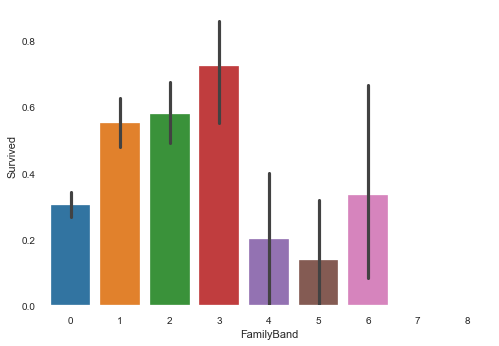

In [46]:
sns.barplot(all_data['FamilyBand'], all_data['Survived']);

In [47]:
#all_data = pd.get_dummies(all_data, columns = ['FamilyBand'])

In [48]:
all_data.drop(['FamilySize'], axis=1, inplace=True)

all_data.head()

,PassengerId,Survived,Pclass,Sex,Cabin,Embarked,Title,FareBand,AgeBand,IsChild,IsElderly,IsAlone,SmallFamily,LargeFamily,FamilyBand
0,1,0.0,3,1,8,2,2,0,2,0,0,0,1,0,1
1,2,1.0,1,0,2,0,3,4,3,0,0,0,1,0,1
2,3,1.0,3,0,8,2,1,0,2,0,0,1,0,0,0
3,4,1.0,1,0,2,2,3,3,3,0,0,0,1,0,1
4,5,0.0,3,1,8,2,2,0,3,0,0,1,0,0,0


In [49]:
all_data.describe()

,PassengerId,Survived,Pclass,Sex,Cabin,Embarked,Title,FareBand,AgeBand,IsChild,IsElderly,IsAlone,SmallFamily,LargeFamily,FamilyBand
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,0.644003,6.729565,1.493506,1.900688,1.331551,2.407181,0.129870,0.030558,0.603514,0.333843,0.062643,0.867074
std,378.020061,0.486592,0.837836,0.478997,2.454520,0.814244,0.786492,2.484833,1.354563,0.336289,0.172182,0.489354,0.471765,0.242413,1.494861
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,8.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,1.000000,8.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,982.000000,1.000000,3.000000,1.000000,8.000000,2.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,8.000000,2.000000,4.000000,14.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [50]:
all_data['Pclass*Fare'] = all_data['Pclass'] * all_data['FareBand']
all_data['Pclass*Age'] = all_data['Pclass'] * all_data['AgeBand']
all_data['Title*Fare'] = all_data['Title'] * all_data['FareBand']
all_data['Title*Age'] = all_data['Title'] * all_data['AgeBand']
all_data['Title*Class'] = all_data['Title'] * all_data['Pclass']
all_data['Embarked*Fare'] = all_data['Embarked'] * all_data['FareBand']
all_data['Embarked*Class'] = all_data['Embarked'] * all_data['Pclass']
all_data['Embarked*Age'] = all_data['Embarked'] * all_data['AgeBand']
all_data['Embarked*Title'] = all_data['Embarked'] * all_data['Title']

all_data = pd.get_dummies(all_data, columns = ['Title', 'Embarked', 'Pclass'])

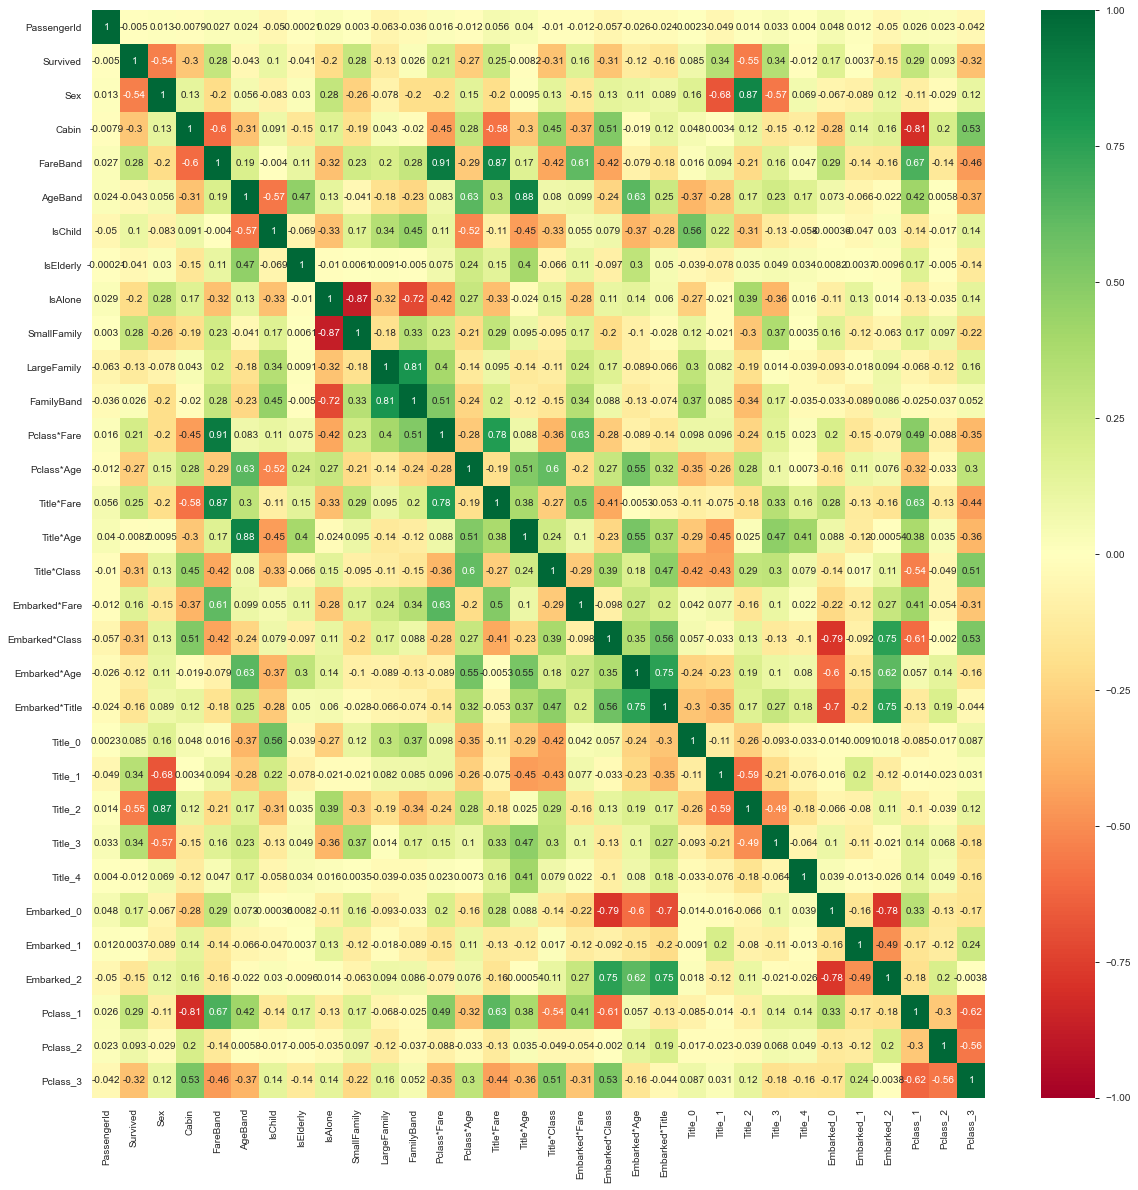

In [51]:
corr_matrix = all_data.corr()

plt.figure (figsize=(20,20))
sns.heatmap(corr_matrix, cmap='RdYlGn', vmin=-1, annot=True)

In [52]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Sex             1309 non-null   int64  
 3   Cabin           1309 non-null   int64  
 4   FareBand        1309 non-null   int64  
 5   AgeBand         1309 non-null   int64  
 6   IsChild         1309 non-null   int64  
 7   IsElderly       1309 non-null   int64  
 8   IsAlone         1309 non-null   int64  
 9   SmallFamily     1309 non-null   int64  
 10  LargeFamily     1309 non-null   int64  
 11  FamilyBand      1309 non-null   int64  
 12  Pclass*Fare     1309 non-null   int64  
 13  Pclass*Age      1309 non-null   int64  
 14  Title*Fare      1309 non-null   int64  
 15  Title*Age       1309 non-null   int64  
 16  Title*Class     1309 non-null   int64  
 17  Embarked*Fare   1309 non-null   i

In [53]:
train = all_data[:ntrain]
test = all_data[ntrain:]

test.drop(['Survived'], axis=1, inplace=True)

In [54]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import accuracy_score

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

PassengerIds = pd.DataFrame(test['PassengerId'])

test.drop(['PassengerId'], axis=1, inplace=True)

#Scale data
#scaler = StandardScaler().fit(test)
scaler = MinMaxScaler().fit(test)
scaled_test = scaler.transform(test)

imputed_test = pd.DataFrame(scaled_test)
imputed_test.columns = test.columns


#Scale data
#scaler = StandardScaler().fit(train)
scaler = MinMaxScaler().fit(train)
scaled_train = scaler.transform(train)

imputed_train = pd.DataFrame(scaled_train)
imputed_train.columns = train.columns

y = train.Survived

imputed_train.drop(['PassengerId','Survived'], axis=1, inplace=True)

X = imputed_train

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

             Specs       Score
21         Title_2  112.805785
0              Sex   92.702447
22         Title_3   89.474177
20         Title_1   79.531749
27        Pclass_1   55.175151
7      SmallFamily   46.912822
29        Pclass_3   41.553071
2         FareBand   21.276475
24      Embarked_0   20.464401
16  Embarked*Class   20.236395
12      Title*Fare   15.066748
6          IsAlone   14.640793
8      LargeFamily   12.983634
10     Pclass*Fare   12.367369
14     Title*Class   11.139908
1            Cabin    9.094624
4          IsChild    8.204610
15   Embarked*Fare    7.119583
19         Title_0    6.180425
28        Pclass_2    6.160767


In [57]:
#use_features = ['Title_2', 'Sex', 'Title_3', 'Title_1', 'SmallFamily', 'Pclass_3', 'FareBand', 'Embarked_0',
#                'Embarked*Class', 'Title*Fare', 'IsAlone', 'LargeFamily', 'Pclass*Fare', 'Title*Class']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42, test_size = 0.15)

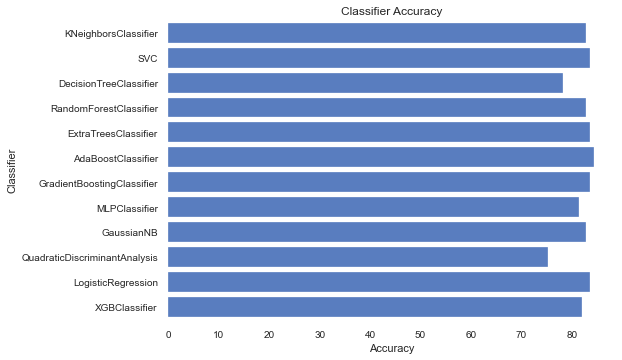

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import XGBClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True, gamma='auto'),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    ExtraTreesClassifier(n_estimators=100, random_state=42),
    #SGDClassifier(random_state=42),
    AdaBoostClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(random_state=42),
    MLPClassifier(max_iter = 1000, random_state= 42),
    GaussianNB(),
    #LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(random_state=42),
    #NearestCentroid(),
    XGBClassifier(objective="binary:logistic", random_state=42)]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}


for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(train_X, train_y)
    train_predictions = clf.predict(val_X)
    acc = accuracy_score(val_y, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] * 100.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [59]:
log.groupby(['Classifier'], as_index=False).mean().sort_values(by='Accuracy', ascending=False)

,Classifier,Accuracy
0,AdaBoostClassifier,84.328358
2,ExtraTreesClassifier,83.582090
4,GradientBoostingClassifier,83.582090
6,LogisticRegression,83.582090
10,SVC,83.582090
3,GaussianNB,82.835821
5,KNeighborsClassifier,82.835821
9,RandomForestClassifier,82.835821
11,XGBClassifier,82.089552
7,MLPClassifier,81.343284


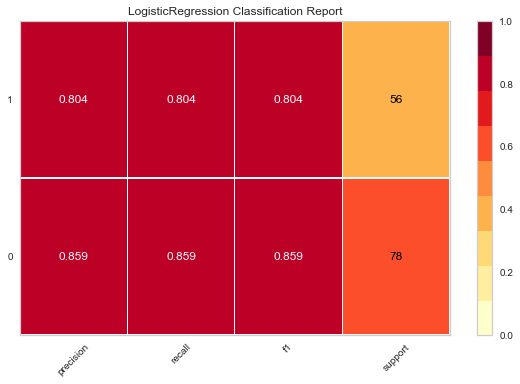

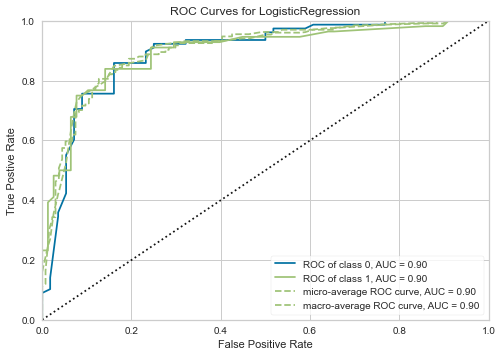

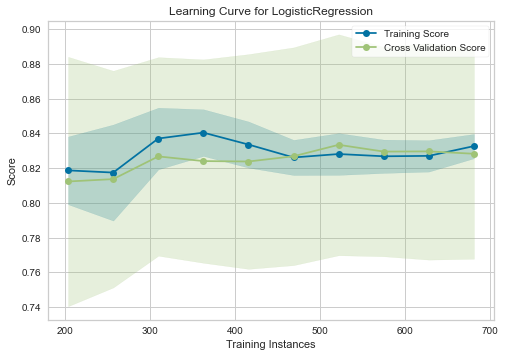

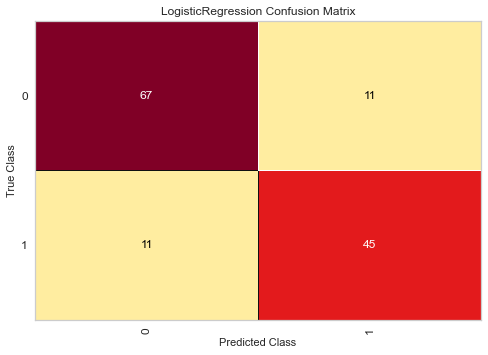

<Figure size 576x396 with 0 Axes>

In [60]:
from sklearn.model_selection import StratifiedKFold

from yellowbrick.classifier import ClassificationReport
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import confusion_matrix

classes = ["0", "1"]

# Instantiate the classification model and visualizer
model = LogisticRegression(random_state=42)

visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(train_X, train_y)        # Fit the visualizer and the model
visualizer.score(val_X, val_y)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#ROCAUC
#roc_auc(model, train_X, train_y, X_test=val_X, y_test=val_y, classes=classes)
roc_auc(model, train_X, train_y, val_X, val_y, classes=classes)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate visualizer
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(train_X, train_y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

# Instantiate confusion matrix
confusion_matrix(
    model,
    train_X, train_y, val_X, val_y,
    classes=classes
)
plt.tight_layout()

In [61]:
pred = visualizer.predict(val_X)
print(classification_report(pred, val_y))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        78
         1.0       0.80      0.80      0.80        56

    accuracy                           0.84       134
   macro avg       0.83      0.83      0.83       134
weighted avg       0.84      0.84      0.84       134



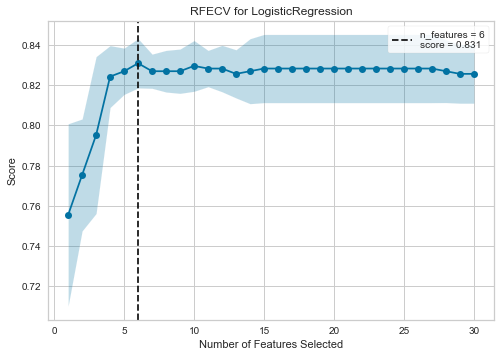

In [62]:
from yellowbrick.model_selection import RFECV

# Instantiate RFECV visualizer
visualizer = RFECV(model)

visualizer.fit(train_X, train_y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [63]:
final_model=visualizer.rfe_estimator_

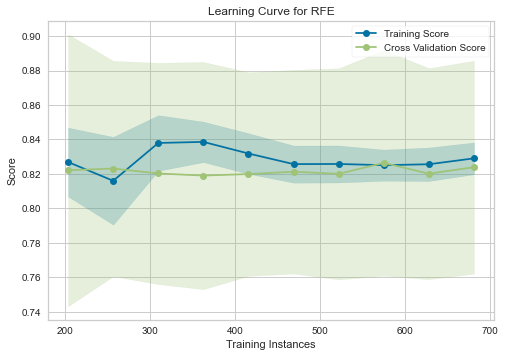

In [64]:
# Instantiate visualizer
visualizer = LearningCurve(
    final_model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(train_X, train_y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

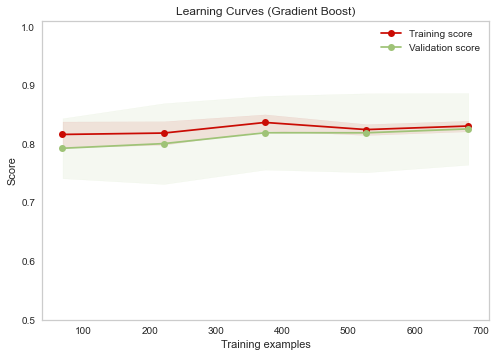

In [65]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict, learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (Gradient Boost)"
cv = 10
plot_learning_curve(final_model, title, train_X, train_y, ylim=(0.5, 1.01), cv=cv, n_jobs=1);


In [66]:
pred = final_model.predict(val_X)
print(classification_report(pred, val_y))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87        81
         1.0       0.79      0.83      0.81        53

    accuracy                           0.84       134
   macro avg       0.84      0.84      0.84       134
weighted avg       0.85      0.84      0.84       134



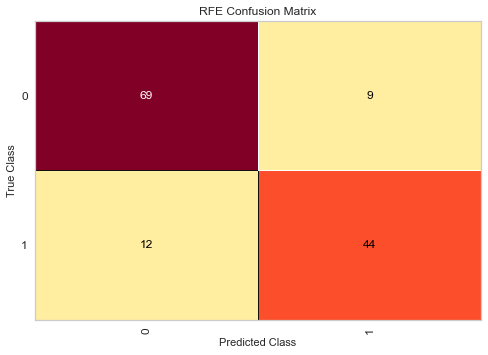

<Figure size 576x396 with 0 Axes>

In [67]:
# Instantiate confusion matrix
confusion_matrix(
    final_model,
    train_X, train_y, val_X, val_y,
    classes=classes
)
plt.tight_layout()

In [68]:
pred = final_model.predict(imputed_test)

submission = pd.DataFrame({'PassengerId':PassengerIds['PassengerId'], 'Survived':pred})

submission['PassengerId'] = submission['PassengerId'].astype('int')
submission['Survived'] = submission['Survived'].astype('int')

filename = 'Titanic Prediction YB.csv'

submission.to_csv(filename, index=False)

In [69]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(final_model, random_state=42).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1179 ± 0.0593,Sex
0.0582 ± 0.0512,Title_2
0.0358 ± 0.0060,Title_0
0.0358 ± 0.0112,LargeFamily
0.0060 ± 0.0112,Cabin
0.0015 ± 0.0060,Pclass_3
0 ± 0.0000,Title_4
0 ± 0.0000,FareBand
0 ± 0.0000,AgeBand
0 ± 0.0000,IsChild


In [81]:
#import shap

# load JS visualization code to notebook
#shap.initjs()

# explain the model's predictions using SHAP

#explainer = shap.TreeExplainer(model)
#shap_values = explainer.shap_values(val_X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
#shap.force_plot(explainer.expected_value, shap_values[4,:], val_X.iloc[4,:])

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

In [72]:
model.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
model.add(Dropout(0.50))
model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9

In [74]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_X, train_y, batch_size=32, epochs=300)

racy: 0.8203
Epoch 106/300
24/24 [==============================] - 0s 899us/step - loss: 0.4076 - accuracy: 0.8309
Epoch 107/300
24/24 [==============================] - 0s 971us/step - loss: 0.4277 - accuracy: 0.8243
Epoch 108/300
24/24 [==============================] - 0s 982us/step - loss: 0.4472 - accuracy: 0.8124
Epoch 109/300
24/24 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.8164
Epoch 110/300
24/24 [==============================] - 0s 890us/step - loss: 0.4329 - accuracy: 0.8309
Epoch 111/300
24/24 [==============================] - 0s 879us/step - loss: 0.4272 - accuracy: 0.8124
Epoch 112/300
24/24 [==============================] - 0s 971us/step - loss: 0.4442 - accuracy: 0.8309
Epoch 113/300
24/24 [==============================] - 0s 1ms/step - loss: 0.4504 - accuracy: 0.8190
Epoch 114/300
24/24 [==============================] - 0s 953us/step - loss: 0.4062 - accuracy: 0.8388
Epoch 115/300
24/24 [==============================] - 0s 921us/

In [75]:
pred = model.predict_classes(val_X)
print(metrics.accuracy_score(val_y, pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.835820895522388


In [76]:
print(classification_report(pred, val_y))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        86
           1       0.73      0.85      0.79        48

    accuracy                           0.84       134
   macro avg       0.82      0.84      0.83       134
weighted avg       0.85      0.84      0.84       134



In [77]:
history=model.fit(train_X, train_y, validation_split=0.25, epochs=300, batch_size=32, verbose=0)

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<function matplotlib.pyplot.show(*args, **kw)>

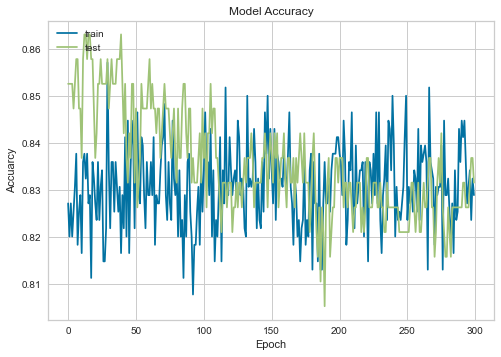

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

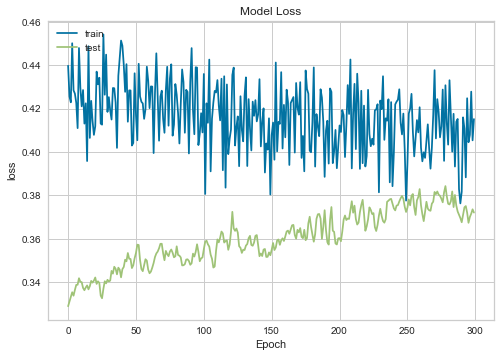

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

In [80]:
pred = model.predict_classes(imputed_test)

submission['PassengerId'] = PassengerIds['PassengerId'].astype('int')
submission['Survived'] = pred.astype('int')

filename = 'Titanic Prediction TF.csv'

submission.to_csv(filename, index=False)